# Optimization (Scenario 1, 2 & 3)

In [1]:
import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm

import brightway2 as bw2
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import datetime
import os
import platform

### SwolfPy version used to produced the results:

In [2]:
pd.DataFrame({'Version': [sp.__version__, sppm.__version__, spid.__version__]},
             index=['swolfpy', 'swolfpy_processmodels', 'swolfpy_inputdata'])

,Version
swolfpy,0.2.4
swolfpy_processmodels,0.1.8
swolfpy_inputdata,0.2.3


### System info

In [3]:
pd.DataFrame({'info': [platform.platform(),
                       platform.processor(),
                       os.cpu_count()]},
             index=['Platform', 'Processor', 'CPU_count'])

,info
Platform,Windows-10-10.0.19041-SP0
Processor,"Intel64 Family 6 Model 158 Stepping 9, Genuine..."
CPU_count,8


## Setup

In [4]:
iter_mehtod = 'LHS' 
n_iter = 100
n_proc = os.cpu_count()

summary = f"""
********  Config *********
Time: {datetime.datetime.now().strftime("%Y-%m-%d & %H:%M:%S")}
Initial guess generation: {iter_mehtod}
N iter: {n_iter}
N proc: {n_proc}\n
"""
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()

## Create project

In [5]:
project_name = 'Optimization'
technosphere = sp.Technosphere(project_name)
common_data = spid.CommonData()
ProcessMetaData = sppm.ProcessModelsMetaData.ProcessModelsMetaData

In [6]:
# Treatment processes
Treatment_processes = {}
Treatment_processes['LF'] = {'input_type':ProcessMetaData['LF']['InputType'] , 'model':sppm.LF()}
Treatment_processes['Composting'] = {'input_type':ProcessMetaData['Comp']['InputType'] , 'model':sppm.Comp()}
Treatment_processes['AD'] = {'input_type':ProcessMetaData['AD']['InputType'] , 'model':sppm.AD()}
Treatment_processes['WTE'] = {'input_type':ProcessMetaData['WTE']['InputType'] , 'model':sppm.WTE()}
Treatment_processes['SS_MRF'] = {'input_type':ProcessMetaData['SS_MRF']['InputType'] , 'model':sppm.SS_MRF()}
Treatment_processes['Reprocessing'] = {'input_type':ProcessMetaData['Reproc']['InputType'] , 'model':sppm.Reproc()}


In [7]:
# Distance
Processes = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'Collection']
data = sppm.Distance.create_distance_table(process_names=Processes,
                                           transport_modes=['Heavy Duty Truck'],
                                           default_dist=30)

distance = sppm.Distance(data)          
data['Heavy Duty Truck']

,LF,Composting,AD,WTE,SS_MRF,Reprocessing,Collection
LF,NaN,30.0,30.0,30.0,30.0,30.0,30.0
Composting,NaN,NaN,30.0,30.0,30.0,30.0,30.0
AD,NaN,NaN,NaN,30.0,30.0,30.0,30.0
WTE,NaN,NaN,NaN,NaN,30.0,30.0,30.0
SS_MRF,NaN,NaN,NaN,NaN,NaN,30.0,30.0
Reprocessing,NaN,NaN,NaN,NaN,NaN,NaN,30.0
Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Collection_processes:
# Only include one single family sector wih residual waste collection
Collection_scheme = sppm.SF_Col.scheme()
Collection_scheme[('RWC', 'SSYW', 'SSR')] = 0.5
Collection_scheme[('RWC', 'N/A', 'N/A')] = 0.5

Collection_processes = {}
Collection_processes['Collection'] = {'input_type': [],
                                      'model': sppm.SF_Col('Collection', Collection_scheme,
                                                      Treatment_processes=Treatment_processes,
                                                      Distance=distance)}

In [9]:
start = time()
demo = sp.Project(project_name, common_data, Treatment_processes, distance, Collection_processes, technosphere)
demo.init_project()
demo.write_project()
demo.group_exchanges()
print("Time for writing the project: {} second".format(round(time()-start)))

Biosphere database already present!!! No setup is needed
Vacuuming database 
Vacuuming database 


Writing activities to SQLite3 database:



                ####
                ++++++  Writing the Technosphere
                


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:15


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:12
  Finished: 11/25/2021 07:37:28
  Total time elapsed: 00:00:15
  CPU %: 45.40
  Memory %: 1.35


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:28
  Finished: 11/25/2021 07:37:28
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 1.36

              ####
              ++++++ Initializing the Composting
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:29
  Finished: 11/25/2021 07:37:29
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.36


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the AD
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:29
  Finished: 11/25/2021 07:37:29
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 1.36

              ####
              ++++++ Initializing the WTE
              


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:29
  Finished: 11/25/2021 07:37:29
  Total time elapsed: 00:00:00
  CPU %: 48.80
  Memory %: 1.36

              ####
              ++++++ Initializing the SS_MRF
              


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:29
  Finished: 11/25/2021 07:37:29
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 1.36

              ####
              ++++++ Initializing the Reprocessing
              


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:29
  Finished: 11/25/2021 07:37:29
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.36

              ####
              ++++++ Initializing the Collection
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:29
  Finished: 11/25/2021 07:37:29
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.36


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:29
  Finished: 11/25/2021 07:37:31
  Total time elapsed: 00:00:01
  CPU %: 41.90
  Memory %: 1.37


Writing activities to SQLite3 database:



                  ####
                  ++++++ Writing the Composting_product
                  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:31
  Finished: 11/25/2021 07:37:31
  Total time elapsed: 00:00:00
  CPU %: 100.80
  Memory %: 1.38

              ####
              ++++++ Writing the Composting
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:31
  Finished: 11/25/2021 07:37:31
  Total time elapsed: 00:00:00
  CPU %: 69.30
  Memory %: 1.38

                  ####
                  ++++++ Writing the AD_product
                  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:31
  Finished: 11/25/2021 07:37:31
  Total time elapsed: 00:00:00
  CPU %: 101.90
  Memory %: 1.39

              ####
              ++++++ Writing the AD
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:31
  Finished: 11/25/2021 07:37:32
  Total time elapsed: 00:00:00
  CPU %: 64.40
  Memory %: 1.39

                  ####
                  ++++++ Writing the WTE_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:32
  Finished: 11/25/2021 07:37:32
  Total time elapsed: 00:00:00
  CPU %: 99.70
  Memory %: 1.40


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the WTE
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:33
  Finished: 11/25/2021 07:37:33
  Total time elapsed: 00:00:00
  CPU %: 65.10
  Memory %: 1.40

                  ####
                  ++++++ Writing the SS_MRF_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:34
  Finished: 11/25/2021 07:37:34
  Total time elapsed: 00:00:00
  CPU %: 60.10
  Memory %: 1.41


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the SS_MRF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:35
  Finished: 11/25/2021 07:37:35
  Total time elapsed: 00:00:00
  CPU %: 91.90
  Memory %: 1.42

              ####
              ++++++ Writing the Reprocessing
              


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:35
  Finished: 11/25/2021 07:37:35
  Total time elapsed: 00:00:00
  CPU %: 66.50
  Memory %: 1.43

                  ####
                  ++++++ Writing the Collection_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:36
  Finished: 11/25/2021 07:37:36
  Total time elapsed: 00:00:00
  CPU %: 85.60
  Memory %: 1.43


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the Collection
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/25/2021 07:37:37
  Finished: 11/25/2021 07:37:37
  Total time elapsed: 00:00:00
  CPU %: 87.50
  Memory %: 1.44

                  Grouping the exchanges with parameters in Database LF
                  

                  Grouping the exchanges with parameters in Database Composting
                  

                  Grouping the exchanges with parameters in Database AD
                  

                  Grouping the exchanges with parameters in Database WTE
                  

                  Grouping the exchanges with parameters in Database SS_MRF
                  

                  Grouping the exchanges with parameters in Database Reprocessing
                  

                  Grouping the exchanges with parameters in Database Collection
                  
Time for writing the project: 76 second


In [10]:
start = time()
demo.update_parameters(demo.parameters.default_parameters_list())
print("Time for updating the parameters: {} second".format(round(time()-start)))

Time for updating the parameters: 10 second


In [11]:
input_dict = {'Collection':{}}

for key in common_data.Index:
    input_dict['Collection'][key]=1
demo.create_scenario(input_dict,'Collection')

## Mass flows, impacts and costs based on default parameters

In [12]:
results = pd.DataFrame(columns=['Value', 'Unit'],
                       index=['Diversion','GWP','Operation Cost','Capital cost','Total cost',
                              'Collection','LF','WTE','Composting','AD','SS_MRF','Reprocessing'])

bw2.projects.set_current('Optimization')
Demand = {('waste', 'Collection'):1}
FU=bw2.get_activity(('waste', 'Collection'))
method = ('IPCC 2013', 'climate change', 'GWP 100a')
lca=bw2.LCA(Demand,method)
lca.lci()
lca.lcia()
results.loc['GWP',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), 'kg CO2/Mg']

lca.switch_method(('SwolfPy_Operational_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Operation Cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']


lca.switch_method(('SwolfPy_Capital_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Capital cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

lca.switch_method(('SwolfPy_Total_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Total cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

for process in ['Collection','LF','WTE','Composting','AD','SS_MRF','Reprocessing']:
    results.loc[process,:] = [round(sp.LCA_matrix.LCA_matrix.get_mass_flow(lca, process)), 'Mg/yr']

results.loc['Diversion',:] = [round((1-results['Value']['LF']/results['Value']['Collection'])*100,2), '%']
results

,Value,Unit
Diversion,50.97,%
GWP,-311.83,kg CO2/Mg
Operation Cost,46.36,$/Mg
Capital cost,18.8,$/Mg
Total cost,65.16,$/Mg
Collection,74621,Mg/yr
LF,36585,Mg/yr
WTE,31057,Mg/yr
Composting,4785,Mg/yr
AD,0,Mg/yr


In [13]:
demo.parameters_list

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 0.5},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_RWC_from_Collection_to_LF', 'amount': 0.5},
 {'name': 'frac_of_RWC_from_Collection_to_WTE', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_Collection_to_Composting', 'amount': 0.5},
 {'name': 'frac_of_SSO_from_Collection_to_AD', 'amount': 0.5},
 {'name': 'frac_of_MRDO_from_Collection_to_LF', 'amount': 0.5},
 {'name': 'frac_of_MRDO_from_Collection_to_WTE', 'amount': 0.5}]

In [14]:
demo.parameters.SWM_network(show_vals=False, all_flow=False, filename='SWM_network_optimization')

In [15]:
# Functions used in reporting the optimization results
def Iterations_Performance(OptObject, FileName):
    objectives = []
    times = []
    for res in OptObject.all_results:
        if res:
            if res.success:
                objectives.append(res.fun * 10**OptObject.magnitude)
                times.append(res.time)
            else:
                objectives.append(None)
                times.append(res.time)
        else:
            objectives.append(None)
            times.append(None)

    DF = pd.DataFrame({'Objective': objectives, 'Time': times})
    DF['Ratio'] = DF['Objective'].fillna(0)/DF['Objective'].fillna(0).min()
    DF.to_csv(FileName)

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = "14"
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(15,9), sharex=True)

    DF['Objective'].plot(kind='bar', ax=ax1, color='b')
    ax1.set_ylabel(Opt.method[0][-1])

    DF['Ratio'].plot(kind='bar', ax=ax2, color='r')
    ax2.set_ylabel('Ratio to minimum')

    DF['Time'].plot(kind='bar', ax=ax3, color='g')
    ax3.set_ylabel("Time (sec)")
    ax3.set_xlabel('Iteration')
    
    if len(list(DF.index)) > 20:
        ax3.set_xticks(list(DF.index[::5]))
        ax3.set_xticklabels(list(DF.index)[::5])
    
    return DF

def report_res(Opt, FU, fileName):
    results = pd.DataFrame(columns=['Value', 'Unit'],
                           index=['Diversion','GWP','Operation Cost','Capital cost','Total cost',
                                  'Collection','LF','WTE','Composting','AD','SS_MRF','Reprocessing'])

    Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
    Opt.lcia()
    results.loc['GWP',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), 'kg CO2/Mg']

    Opt.switch_method(('SwolfPy_Operational_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Operation Cost',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']


    Opt.switch_method(('SwolfPy_Capital_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Capital cost',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

    Opt.switch_method(('SwolfPy_Total_Cost', 'SwolfPy'))
    Opt.lcia()
    results.loc['Total cost',:] = [round(Opt.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

    for process in ['Collection','LF','WTE','Composting','AD','SS_MRF','Reprocessing']:
        results.loc[process,:] = [round(sp.LCA_matrix.LCA_matrix.get_mass_flow(Opt, process)), 'Mg/yr']

    results.loc['Diversion',:] = [round((1-results['Value']['LF']/results['Value']['Collection'])*100,2), '%']
    results.to_csv(fileName)
    return(results)

# Optimization: Scenario 1

In [16]:
Opt=sp.Optimization(Demand,[('IPCC 2013', 'climate change', 'GWP 100a')],demo)
config=Opt.config(demo)
config.iloc[6:,1] = 'Fix'
Opt.set_config(config)
print(config)

                               Collection Collection mode
(RWC, N/A, N/A)                       0.5        Optimize
(RWC, N/A, SSR)                         0        Optimize
(RWC, SSYW, N/A)                        0        Optimize
(RWC, SSYW, SSR)                      0.5        Optimize
(RWC, SSO, N/A)                         0        Optimize
(RWC, SSO, SSR)                         0        Optimize
(REC_WetRes, N/A, REC_WetRes)           0             Fix
(REC_WetRes, SSYW, REC_WetRes)          0             Fix
(REC_WetRes, SSO, REC_WetRes)           0             Fix
(ORG_DryRes, ORG_DryRes, N/A)           0             Fix
(ORG_DryRes, ORG_DryRes, SSR)           0             Fix


In [17]:
constraints = {}
constraints['WTE'] = {'limit':0, 'KeyType':'Process','ConstType':"<="}

In [18]:
start = time()
sp.Optimization.multi_start_optimization(Opt, constraints=constraints, collection=True,
                                         n_iter=n_iter, nproc=n_proc, timeout=1000, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results_2 = Opt.all_results



                      Iteration: 0
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -28984730.714172985
                      Global min: -28984730.714172985 

                      


                      Iteration: 1
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -28984730.714174185
                      Global min: -28984730.714174185 

                      


                      Iteration: 2
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -28984730.714175016
                      Global min: -28984730.714175016 

                      


                      Iteration: 3
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -28984730.714174185
                      Global min: -2898

Time for Optimization: 1410 second


### Performance of iterations

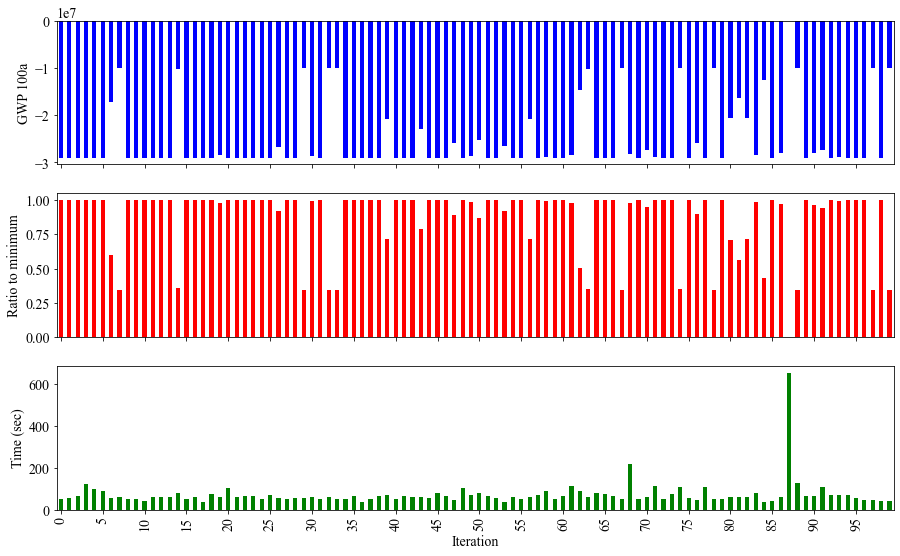

In [19]:
DF = Iterations_Performance(Opt, 'Iterations_Scenario1.csv')

## Mass flows, impacts and costs

In [20]:
report_res(Opt, FU, 'OptimizeScenario1.csv')

,Value,Unit
Diversion,21.26,%
GWP,-388.43,kg CO2/Mg
Operation Cost,34.75,$/Mg
Capital cost,2.43,$/Mg
Total cost,37.17,$/Mg
Collection,74621,Mg/yr
LF,58759,Mg/yr
WTE,0,Mg/yr
Composting,0,Mg/yr
AD,0,Mg/yr


In [21]:
Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
Opt.lcia()
Opt.plot_sankey(fileName='OptimizeScenario1.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'Collection']
              source = [1, 1, 2, 2, 4, 4, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6]
              target = [0, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 3, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 1]
              label_link = ['Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'RWC', 'RWC', 'SSO', 'SSO', 'MRDO', 'MRDO', 'Bottom_Ash', 'Fly_Ash', 'Unreacted_Ash', 'Al', 'Fe', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'SSR', 'SSYW', 'SSYWDO']
              value = [0.0, 0.0, 0.0, 0.0, 2443.883, 0.0, 56315.39, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 173.358, 6441.844, 5056.289, 0.0, 0.0, 0.0, 520.075, 115.572, 260.038, 

In [22]:
Opt.optimized_x

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 1.0},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 1.0},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 1.0},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_RWC_from_Collection_to_LF', 'amount': 1.0},
 {'name': 'frac_of_RWC_from_Collection_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_Collection_to_Composting', 'amount': 0.5929},
 {'name': 'frac_of_SSO_from_Collection_to_AD', 'amount': 0.4071},
 {'name': 'frac_of_MRDO_from_Collection_to_LF', 'amount': 0.5447},
 {'name': 'frac_of_MRDO_from_Collection_to_WTE', 'amount': 0.4553},
 {'name': ('Collection', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('Collection', ('RWC', 'N/A', 'SSR')), 'amount': 1.0},
 {'name': ('Collection', ('RWC', 'SSYW', 'N/A

In [23]:
summary = f"""\n
********  Scenario 1 - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'Collection': [12, 13, 14, 15, 16, 17]} 




********  Scenario 1 - Summary *********
Number of decision variables: 18
Number of constraints: 8
Total time: 0:23:30
Average time per iteration: 0:01:12
Successful iterations: 99
Number of best iterations: 64
Number of >95 iterations: 71




# Optimization: Scenario 2

In [24]:
Opt=sp.Optimization(Demand, [('IPCC 2013', 'climate change', 'GWP 100a')], demo)

In [25]:
config=Opt.config(demo)
config.iloc[6:,1] = 'Fix'
Opt.set_config(config)
print(config)

                               Collection Collection mode
(RWC, N/A, N/A)                       0.5        Optimize
(RWC, N/A, SSR)                         0        Optimize
(RWC, SSYW, N/A)                        0        Optimize
(RWC, SSYW, SSR)                      0.5        Optimize
(RWC, SSO, N/A)                         0        Optimize
(RWC, SSO, SSR)                         0        Optimize
(REC_WetRes, N/A, REC_WetRes)           0             Fix
(REC_WetRes, SSYW, REC_WetRes)          0             Fix
(REC_WetRes, SSO, REC_WetRes)           0             Fix
(ORG_DryRes, ORG_DryRes, N/A)           0             Fix
(ORG_DryRes, ORG_DryRes, SSR)           0             Fix


In [26]:
start = time()
sp.Optimization.multi_start_optimization(Opt, collection=True,  n_iter=n_iter, timeout=1000,
                                         nproc=n_proc, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results_1 = Opt.all_results



                      Iteration: 0
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -35667141.57444192
                      Global min: -35667141.57444192 

                      


                      Iteration: 1
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -35667141.574435934
                      Global min: -35667141.57444192 

                      


                      Iteration: 2
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -35667141.57443676
                      Global min: -35667141.57444192 

                      


                      Iteration: 3
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -35667141.57444308
                      Global min: -35667141.5

Time for Optimization: 598 second


### Performance of iterations

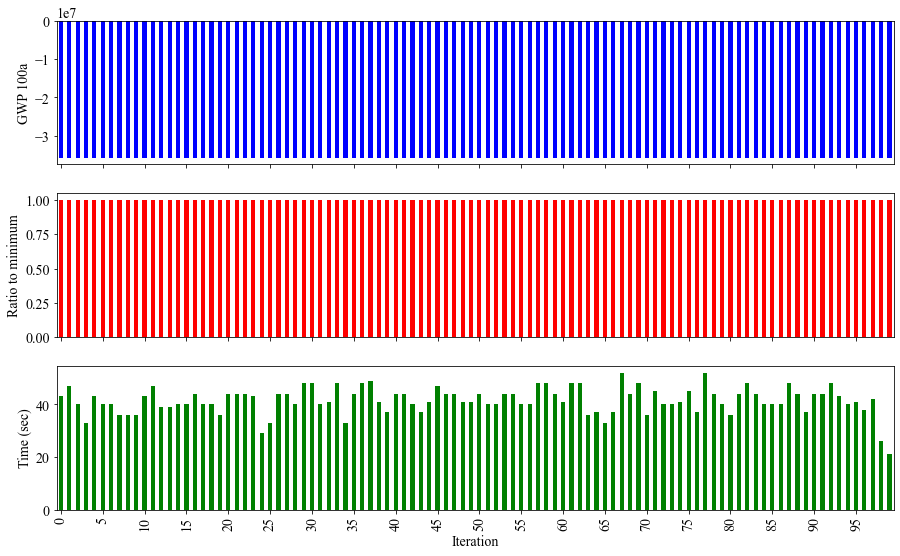

In [27]:
DF = Iterations_Performance(Opt, 'Iterations_Scenario2.csv')

## Mass flows, impacts and costs

In [28]:
report_res(Opt, FU, 'OptimizeScenario2.csv')

,Value,Unit
Diversion,86.63,%
GWP,-477.98,kg CO2/Mg
Operation Cost,21.24,$/Mg
Capital cost,35.28,$/Mg
Total cost,56.52,$/Mg
Collection,74621,Mg/yr
LF,9978,Mg/yr
WTE,58759,Mg/yr
Composting,0,Mg/yr
AD,0,Mg/yr


In [29]:
Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
Opt.lcia()
Opt.plot_sankey(fileName='OptimizeScenario2.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'Collection']
              source = [1, 1, 2, 2, 4, 4, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6]
              target = [0, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 3, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 1]
              label_link = ['Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'RWC', 'RWC', 'SSO', 'SSO', 'MRDO', 'MRDO', 'Bottom_Ash', 'Fly_Ash', 'Unreacted_Ash', 'Al', 'Fe', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'SSR', 'SSYW', 'SSYWDO']
              value = [0.0, 0.0, 0.0, 0.0, 0.0, 2443.883, 0.0, 56315.39, 0.0, 0.0, 0.0, 0.0, 8682.345, 1296.078, 0.0, 219.72, 1209.874, 173.358, 6441.844, 5056.289, 0.0, 0.0, 0.0, 520.075, 

In [30]:
Opt.optimized_x

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.5478},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.4522},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 0.2035},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.7965},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 0.0},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 1.0},
 {'name': 'frac_of_RWC_from_Collection_to_LF', 'amount': 0.0},
 {'name': 'frac_of_RWC_from_Collection_to_WTE', 'amount': 1.0},
 {'name': 'frac_of_SSO_from_Collection_to_Composting', 'amount': 0.61},
 {'name': 'frac_of_SSO_from_Collection_to_AD', 'amount': 0.39},
 {'name': 'frac_of_MRDO_from_Collection_to_LF', 'amount': 0.6631},
 {'name': 'frac_of_MRDO_from_Collection_to_WTE', 'amount': 0.3369},
 {'name': ('Collection', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('Collection', ('RWC', 'N/A', 'SSR')), 'amount': 1.0},
 {'name': ('Collection', ('RWC', 'SSY

In [31]:
summary = f"""\n
********  Scenario 2 - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'Collection': [12, 13, 14, 15, 16, 17]} 




********  Scenario 2 - Summary *********
Number of decision variables: 18
Number of constraints: 7
Total time: 0:09:58
Average time per iteration: 0:00:42
Successful iterations: 100
Number of best iterations: 100
Number of >95 iterations: 100




# Optimization: Scenario 3

In [32]:
Opt=sp.Optimization(Demand,[('IPCC 2013', 'climate change', 'GWP 100a')],demo)
config=Opt.config(demo)
config.iloc[6:,1] = 'Fix'
Opt.set_config(config)
print(config)

                               Collection Collection mode
(RWC, N/A, N/A)                       0.5        Optimize
(RWC, N/A, SSR)                         0        Optimize
(RWC, SSYW, N/A)                        0        Optimize
(RWC, SSYW, SSR)                      0.5        Optimize
(RWC, SSO, N/A)                         0        Optimize
(RWC, SSO, SSR)                         0        Optimize
(REC_WetRes, N/A, REC_WetRes)           0             Fix
(REC_WetRes, SSYW, REC_WetRes)          0             Fix
(REC_WetRes, SSO, REC_WetRes)           0             Fix
(ORG_DryRes, ORG_DryRes, N/A)           0             Fix
(ORG_DryRes, ORG_DryRes, SSR)           0             Fix


In [33]:
constraints = {}
constraints['WTE'] = {'limit':0, 'KeyType':'Process','ConstType':"<="}
constraints['LF'] = {'limit':44772, 'KeyType':'Process','ConstType':"<="}

In [34]:
start = time()
sp.Optimization.multi_start_optimization(Opt, constraints=constraints, collection=True,
                                         n_iter=n_iter, timeout=1000, nproc=n_proc, initialize_guess=iter_mehtod)
total_time = round(time()-start)
print("Time for Optimization: {} second".format(total_time))
all_results_3 = Opt.all_results



                      Iteration: 0
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -25879834.57612954
                      Global min: -25879834.57612954 

                      


                      Iteration: 1
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -26691812.233828932
                      Global min: -26691812.233828932 

                      


                      Iteration: 2
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -25879833.77809425
                      Global min: -26691812.233828932 

                      


                      Iteration: 3
                      Status: True, Message: Optimization terminated successfully
                      Objective function: -25879834.57653469
                      Global min: -26691812

Time for Optimization: 1222 second


### Performance of iterations

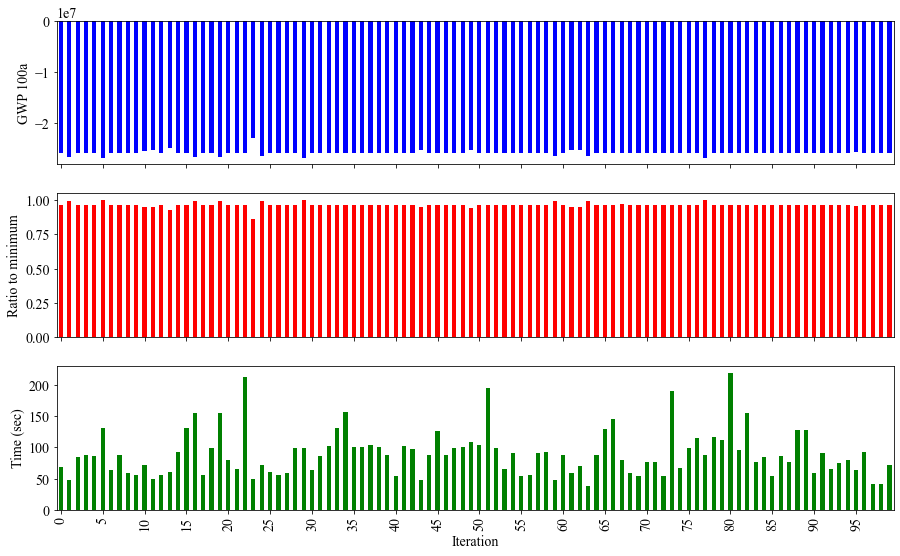

In [35]:
DF = Iterations_Performance(Opt, 'Iterations_Scenario3.csv')

## Mass flows, impacts and costs

In [36]:
report_res(Opt, FU, 'OptimizeScenario3.csv')

,Value,Unit
Diversion,40.0,%
GWP,-359.52,kg CO2/Mg
Operation Cost,54.38,$/Mg
Capital cost,11.81,$/Mg
Total cost,66.19,$/Mg
Collection,74621,Mg/yr
LF,44771,Mg/yr
WTE,0,Mg/yr
Composting,0,Mg/yr
AD,14875,Mg/yr


In [37]:
Opt.switch_method(('IPCC 2013', 'climate change', 'GWP 100a'))
Opt.lcia()
Opt.plot_sankey(fileName='OptimizeScenario3.html')


              # Sankey Mass flows
              label = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'Collection']
              source = [1, 1, 2, 2, 4, 4, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6]
              target = [0, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 3, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 1]
              label_link = ['Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'Other_Residual', 'RWC', 'RWC', 'SSO', 'SSO', 'MRDO', 'MRDO', 'Bottom_Ash', 'Fly_Ash', 'Unreacted_Ash', 'Al', 'Fe', 'LDPE_Film', 'OCC', 'Mixed_Paper', 'ONP', 'OFF', 'Fiber_Other', 'Brown_glass', 'Clear_glass', 'Green_glass', 'Mixed_Glass', 'PET', 'HDPE_P', 'HDPE_T', 'Fe', 'Al', 'SSR', 'SSYW', 'SSYWDO']
              value = [0.0, 0.0, 886.663, 0.0, 2443.883, 0.0, 41440.718, 0.0, 0.0, 14874.672, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 173.358, 6441.844, 5056.289, 0.0, 0.0, 0.0, 520.075, 115.572

In [38]:
Opt.optimized_x

[{'name': 'frac_of_Other_Residual_from_Composting_to_LF', 'amount': 0.4769},
 {'name': 'frac_of_Other_Residual_from_Composting_to_WTE', 'amount': 0.5231},
 {'name': 'frac_of_Other_Residual_from_AD_to_LF', 'amount': 1.0},
 {'name': 'frac_of_Other_Residual_from_AD_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_LF', 'amount': 1.0},
 {'name': 'frac_of_Other_Residual_from_SS_MRF_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_RWC_from_Collection_to_LF', 'amount': 1.0},
 {'name': 'frac_of_RWC_from_Collection_to_WTE', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_Collection_to_Composting', 'amount': 0.0},
 {'name': 'frac_of_SSO_from_Collection_to_AD', 'amount': 1.0},
 {'name': 'frac_of_MRDO_from_Collection_to_LF', 'amount': 0.2038},
 {'name': 'frac_of_MRDO_from_Collection_to_WTE', 'amount': 0.7962},
 {'name': ('Collection', ('RWC', 'N/A', 'N/A')), 'amount': 0.0},
 {'name': ('Collection', ('RWC', 'N/A', 'SSR')), 'amount': 0.1039},
 {'name': ('Collection', ('RWC', 'SSYW', '

In [39]:
summary = f"""\n
********  Scenario 3 - Summary *********
Number of decision variables: {len(Opt.optimized_x)}
Number of constraints: {len(Opt._create_constraints())}
Total time: {str(datetime.timedelta(seconds=round(total_time)))}
Average time per iteration: {str(datetime.timedelta(seconds=round(DF['Time'].mean())))}
Successful iterations: {sum(DF['Ratio']>0)}
Number of best iterations: {sum(DF['Ratio']>0.99)}
Number of >95 iterations: {sum(DF['Ratio']>0.95)}\n\n"""
print(summary)
text_file = open("Summary.txt", "a")
text_file.write(summary)
text_file.close()



 collection constraints dict: 
 {'Collection': [12, 13, 14, 15, 16, 17]} 




********  Scenario 3 - Summary *********
Number of decision variables: 18
Number of constraints: 9
Total time: 0:20:22
Average time per iteration: 0:01:30
Successful iterations: 100
Number of best iterations: 9
Number of >95 iterations: 92


